In [1]:
# # Jupyter Notebook'u tam sayfa yapmak için...
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

In [2]:
!pip install missingno
!pip install mlxtend
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import mlxtend
import warnings
import datetime as dt
!pip install lazypredict
!pip uninstall scikit-learn imbalanced-learn -y
!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 400)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.mode.chained_assignment = None

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0
  Using cached scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl (9.4 MB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


In [4]:
df = pd.read_csv("diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [8]:
def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car, num_but_cat


In [10]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [12]:
for column in df.columns:
    zero_count = (df[column] == 0).sum()
    if zero_count > 0:
        print(f"{column}: {zero_count} adet 0 değeri")
        print("\n ############# \n")

Pregnancies: 111 adet 0 değeri

 ############# 

Glucose: 5 adet 0 değeri

 ############# 

BloodPressure: 35 adet 0 değeri

 ############# 

SkinThickness: 227 adet 0 değeri

 ############# 

Insulin: 374 adet 0 değeri

 ############# 

BMI: 11 adet 0 değeri

 ############# 

Outcome: 500 adet 0 değeri

 ############# 



In [14]:
for column in df.columns:
    zero_count = (df[column] == 0).sum()/df.shape[0]
    if zero_count > 0:
        print(f"{column}: {zero_count:.2%} oranında 0 değeri")
        print("\n ############# \n")

Pregnancies: 14.45% oranında 0 değeri

 ############# 

Glucose: 0.65% oranında 0 değeri

 ############# 

BloodPressure: 4.56% oranında 0 değeri

 ############# 

SkinThickness: 29.56% oranında 0 değeri

 ############# 

Insulin: 48.70% oranında 0 değeri

 ############# 

BMI: 1.43% oranında 0 değeri

 ############# 

Outcome: 65.10% oranında 0 değeri

 ############# 



In [16]:
#data içerisinde 0 olan ama aslında null değerleri nan olarak değiştirme
zero_columns= [col for col in df.columns if (df[col].min() == 0 and col not in ['Pregnancies','Outcome'])]

In [18]:
zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [20]:
for col in zero_columns:
    df[col] = df[col].replace(0, np.nan)

In [22]:
df.shape

(768, 9)

In [24]:
#knn missing v
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df = pd.DataFrame(scaler.inverse_transform(df), columns=df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.00,148.00,72.00,35.00,334.20,33.60,0.63,50.00,1.00
1,1.00,85.00,66.00,29.00,56.20,26.60,0.35,31.00,0.00
2,8.00,183.00,64.00,32.20,238.00,23.30,0.67,32.00,1.00
3,1.00,89.00,66.00,23.00,94.00,28.10,0.17,21.00,0.00
4,0.00,137.00,40.00,35.00,168.00,43.10,2.29,33.00,1.00


In [26]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
# outlier eşiğini belirliyoruz
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [30]:
for col in num_cols:
    print(col, outlier_thresholds(df, col))

Pregnancies (-6.499999999999998, 13.499999999999996)
Glucose (36.0, 204.0)
BloodPressure (39.99999999999998, 104.00000000000003)
SkinThickness (4.874999999999989, 53.075)
Insulin (-60.199999999999974, 338.19999999999993)
BMI (13.599999999999994, 50.400000000000006)
DiabetesPedigreeFunction (-0.32999999999999996, 1.2)
Age (-1.5, 66.5)


In [32]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[col_name][(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)]
    return outliers.any() 

In [34]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies True
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [36]:
# trashold değerlerine baskılama fonksiyonu
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [38]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [40]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.00,148.00,72.00,35.00,334.20,33.60,0.63,50.00,1.00
1,1.00,85.00,66.00,29.00,56.20,26.60,0.35,31.00,0.00
2,8.00,183.00,64.00,32.20,238.00,23.30,0.67,32.00,1.00
3,1.00,89.00,66.00,23.00,94.00,28.10,0.17,21.00,0.00
4,0.00,137.00,40.00,35.00,168.00,43.10,1.20,33.00,1.00


In [44]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Özellikleri (X) ve hedef değişkeni (y) ayır
A = df.drop("Outcome", axis=1)
B = df["Outcome"]

# 2. SMOTE nesnesini oluştur
smote = SMOTE(random_state=42)

# 3. SMOTE uygulayarak veriyi dengele
X_resampled, y_resampled = smote.fit_resample(A, B)

# 4. Yeni dengelenmiş veri çerçevesini oluştur
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=A.columns),
                           pd.DataFrame(y_resampled, columns=["Outcome"])], axis=1)

# 5. Sınıf dağılımını kontrol et
print("Orijinal veri dağılımı:", Counter(A))
print("SMOTE sonrası veri dağılımı:", Counter(y_resampled))

# İlk birkaç satırı göster
df_resampled.head()

Orijinal veri dağılımı: Counter({'Pregnancies': 1, 'Glucose': 1, 'BloodPressure': 1, 'SkinThickness': 1, 'Insulin': 1, 'BMI': 1, 'DiabetesPedigreeFunction': 1, 'Age': 1})
SMOTE sonrası veri dağılımı: Counter({1.0: 500, 0.0: 500})


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.00,148.00,72.00,35.00,334.20,33.60,0.63,50.00,1.00
1,1.00,85.00,66.00,29.00,56.20,26.60,0.35,31.00,0.00
2,8.00,183.00,64.00,32.20,238.00,23.30,0.67,32.00,1.00
3,1.00,89.00,66.00,23.00,94.00,28.10,0.17,21.00,0.00
4,0.00,137.00,40.00,35.00,168.00,43.10,1.20,33.00,1.00


In [46]:
X = df_resampled.drop('Outcome', axis=1)
y = df_resampled['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print("X_test: ", X_test.shape),
print ("y_test: ", y_test.shape)

X_train:  (800, 8)
y_train:  (800,)
X_test:  (200, 8)
y_test:  (200,)


In [48]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import recall_score

# Recall metriği için özel fonksiyon
def recall(y_true, y_pred):
    return recall_score(y_true, y_pred)

# LazyClassifier recall'u da ölçsün
clf = LazyClassifier(ignore_warnings=True, custom_metric=recall)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 399, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1403
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498750 -> initscore=-0.005000
[LightGBM] [Info] Start training from score -0.005000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  recall  Time Taken
Model                                                                                            
ExtraTreesClassifier               0.85               0.85     0.85      0.85    0.94       

🌲 ExtraTreesClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.76      0.83        99
         1.0       0.80      0.94      0.86       101

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



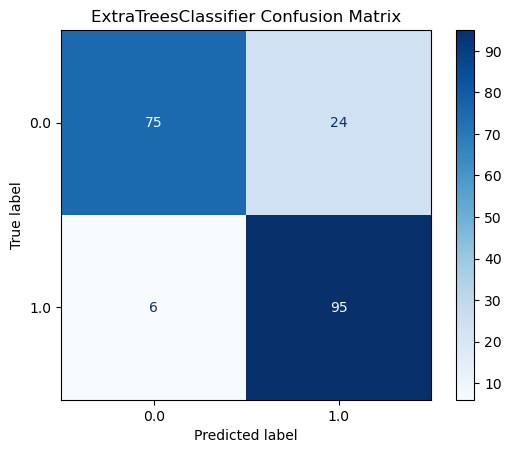

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Modeli tanımla ve eğit
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

# Tahmin yap
y_pred_et = et_model.predict(X_test)

# Sınıflandırma raporu
print("🌲 ExtraTreesClassifier Classification Report:")
print(classification_report(y_test, y_pred_et, digits=2))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_et, cmap="Blues", values_format="d")
plt.title("ExtraTreesClassifier Confusion Matrix")
plt.show()

In [50]:
from sklearn.metrics import classification_report
rand_score_test=et_model.score(X_test, y_test)
rand_score_train=et_model.score(X_train, y_train)


print("accuracy score test :",rand_score_test)
print("accuracy score train:",rand_score_train)

accuracy score test : 0.85
accuracy score train: 1.0


🌳 RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.74      0.80        99
         1.0       0.78      0.90      0.83       101

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



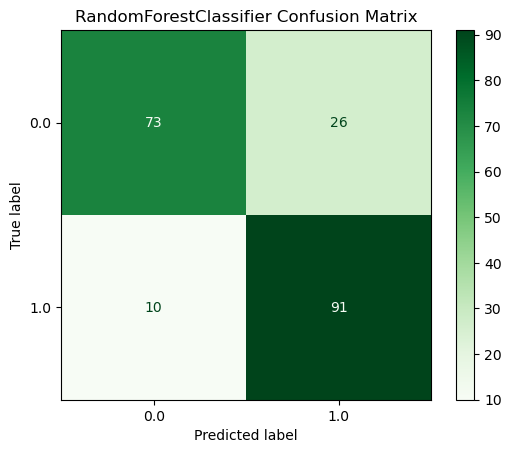

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. RandomForestClassifier modelini oluştur
rf_model = RandomForestClassifier(random_state=42)

# 2. Modeli eğitim verisiyle eğit
rf_model.fit(X_train, y_train)
y_pred_train = rf_model.predict(X_train)

# 3. Test verisi ile tahmin yap
y_pred_rf = rf_model.predict(X_test)

# 4. Sınıflandırma raporunu yazdır
print("🌳 RandomForestClassifier Classification Report:")
print(classification_report(y_test, y_pred_rf, digits=2))

# 5. Confusion Matrix'i çiz
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf, cmap="Greens", values_format="d"
)
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

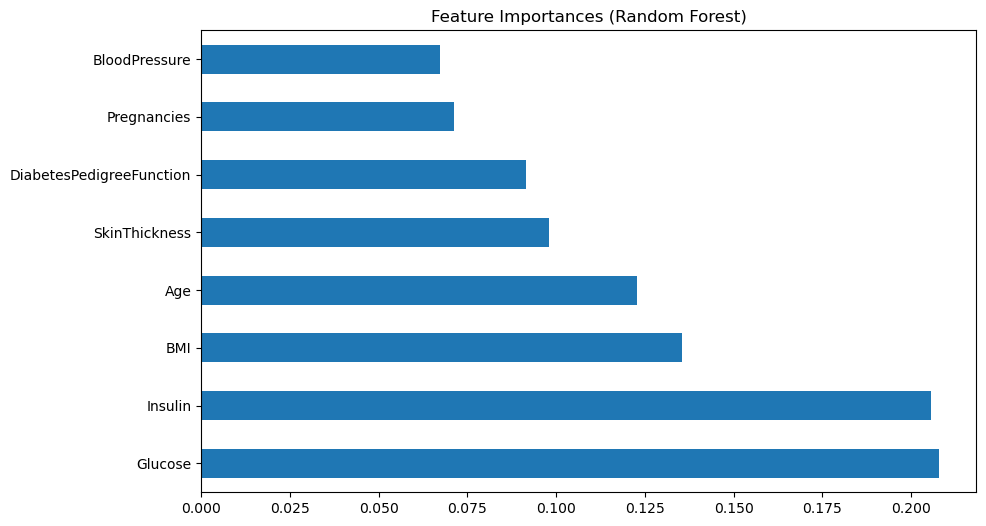

In [56]:
pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind="barh", figsize=(10,6))
plt.title("Feature Importances (Random Forest)")
plt.show()

In [58]:
from sklearn.metrics import classification_report
rand_score_test=rf_model.score(X_test, y_test)
rand_score_train=rf_model.score(X_train, y_train)


print("accuracy score test :",rand_score_test)
print("accuracy score train:",rand_score_train)

accuracy score test : 0.82
accuracy score train: 1.0


In [60]:
from sklearn.metrics import recall_score

# Eğitim ve test verisi için tahminler
y_pred_rf = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

# Recall skorlarını hesapla (ikili sınıflandırma varsayılarak)
recall_test = recall_score(y_test, y_pred_rf)
recall_train = recall_score(y_train, y_pred_train)

print("Recall (Test):", recall_test)
print("Recall (Train):", recall_train)

Recall (Test): 0.900990099009901
Recall (Train): 1.0


In [62]:
# İlk ağacın derinliğini göster
print("İlk karar ağacının derinliği:", rf_model.estimators_[0].get_depth())

İlk karar ağacının derinliği: 16


In [64]:
depths = [est.get_depth() for est in rf_model.estimators_]
print("Ortalama derinlik:", sum(depths)/len(depths))

Ortalama derinlik: 15.01


🌳 RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.71      0.79        99
         1.0       0.76      0.91      0.83       101

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



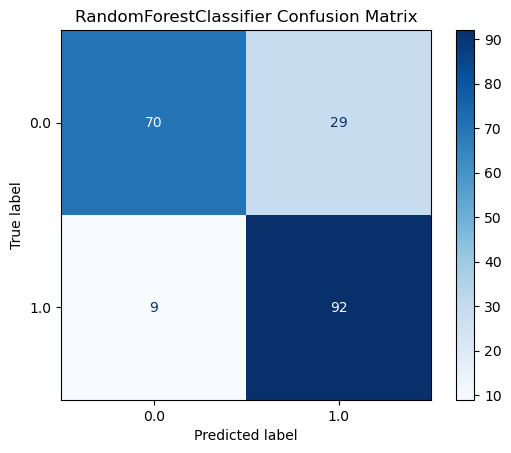

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. RandomForestClassifier modelini oluştur max depth 5
rf_model = RandomForestClassifier( max_depth=5, random_state=42)

# 2. Modeli eğitim verisiyle eğit
rf_model.fit(X_train, y_train)
y_pred_train = rf_model.predict(X_train)

# 3. Test verisi ile tahmin yap
y_pred_rf = rf_model.predict(X_test)

# 4. Sınıflandırma raporunu yazdır
print("🌳 RandomForestClassifier Classification Report:")
print(classification_report(y_test, y_pred_rf, digits=2))

# 5. Confusion Matrix'i çiz
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf, cmap="Blues", values_format="d"
)
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

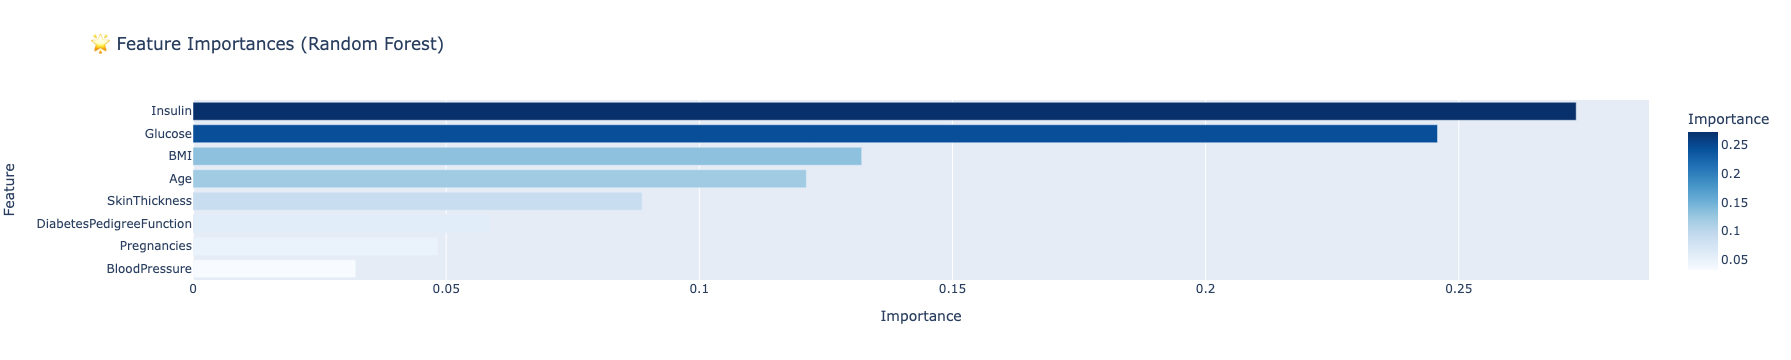

In [94]:
import plotly.express as px
import pandas as pd

# Veri hazırla
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Etkileşimli yatay bar grafiği
fig = px.bar(
    feat_imp_df, 
    x='Importance', 
    y='Feature', 
    orientation='h', 
    color='Importance',
    color_continuous_scale='Blues',  # Mavi tonları
    title='🌟 Feature Importances (Random Forest)'
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [96]:
# İlk ağacın derinliğini göster
print("İlk karar ağacının derinliği:", rf_model.estimators_[0].get_depth())

İlk karar ağacının derinliği: 5


In [98]:
depths = [est.get_depth() for est in rf_model.estimators_]
print("Ortalama derinlik:", sum(depths)/len(depths))

Ortalama derinlik: 5.0


In [100]:
from sklearn.metrics import classification_report
rand_score_test=rf_model.score(X_test, y_test)
rand_score_train=rf_model.score(X_train, y_train)


print("Accuracy Score (Test) :",rand_score_test)
print("Accuracy Score (Train):",rand_score_train)

Accuracy Score (Test) : 0.81
Accuracy Score (Train): 0.8775


In [102]:
from sklearn.metrics import recall_score

# Eğitim ve test verisi için tahminler
y_pred_rf = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

# Recall skorlarını hesapla (ikili sınıflandırma varsayılarak)
recall_test = recall_score(y_test, y_pred_rf)
recall_train = recall_score(y_train, y_pred_train)

print("Recall (Test):", recall_test)
print("Recall (Train):", recall_train)

Recall (Test): 0.9108910891089109
Recall (Train): 0.9147869674185464


In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Modeli oluştur
rf_model = RandomForestClassifier(max_depth=5, random_state=42)

# 5-fold cross-validation ile accuracy ölç
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Sonuçları yazdır
print("Cross-validation accuracy scores:", cv_scores)
print("Ortalama accuracy:", cv_scores.mean())

Cross-validation accuracy scores: [0.77  0.765 0.81  0.85  0.82 ]
Ortalama accuracy: 0.8030000000000002


In [106]:

# Recall için cross-validation
recall_scores = cross_val_score(rf_model, X, y, cv=5, scoring='recall')

# Sonuçları yazdır
print("Cross-validation recall scores:", recall_scores)
print("Ortalama recall:", recall_scores.mean())

Cross-validation recall scores: [0.81 0.8  0.84 0.93 0.88]
Ortalama recall: 0.8520000000000001
